# 01 케라스 텍스트 처리 및 임베딩

- 코드 참조: 케라스 창시자에게 배우는 딥러닝



## 용어 설명

- `토큰(token)`
  - 텍스트를 나누는 단위

  - 토큰화(tokenization): 토큰으로 나누는 작업

- `n-gram`
  - 문장에서 추출한 N개(또는 그 이하)의 연속된 단어 그룹

  - 같은 개념이 '문자'에도 적용가능

  <img src="https://www.sqlservercentral.com/wp-content/uploads/legacy/0bf6a2bd621db172dba029ce3c712280a3f6aab3/29444.jpg">

  <sub>출처: https://www.sqlservercentral.com/articles/nasty-fast-n-grams-part-1-character-level-unigrams</sub>

## 문자 수준 원-핫 인코딩

In [ ]:
import numpy as np

In [ ]:
samples = ['The cat sat on the mat.',
           'The dog ate my homeworks.']

token_index = {}

In [ ]:
# 문장을 Space단위로 Split => Split한 단어가 word_index에 들어있지 않으면 추가, 번호를 1부터 매김
for sample in samples :
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homeworks.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [ ]:
max_len = 10
results = np.zeros(shape = (len(samples), max_len,
                            max(token_index.values()) + 1))

In [ ]:
# 원핫 인코딩
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_len]:
    index = token_index.get(word)
    results[i, j, index] = 1.

results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## 케라스를 사용한 단어 수준 원-핫 인코딩

- `fit_on_texts()`

- `texts_to_sequences()`

- `texts_to_matrix()`

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
samples = ['The cat sat on the mat.',
           'The dog ate my homeworks.']
 
tokenizer = Tokenizer(num_words = 1000) # 최대 1000개의 단어를 토큰화하는 토큰생성 객체 
tokenizer.fit_on_texts(samples) # 적용 
tokenizer.word_index # 토큰화한 단어들에 인덱스
tokenizer.word_index, len(tokenizer.word_index)

({'ate': 7,
  'cat': 2,
  'dog': 6,
  'homeworks': 9,
  'mat': 5,
  'my': 8,
  'on': 4,
  'sat': 3,
  'the': 1},
 9)

In [ ]:
sequences = tokenizer.texts_to_sequences(samples) # 토큰들을 시퀀스로 (번호를 매김)
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
ohe_results = tokenizer.texts_to_matrix(samples, mode = 'binary') # 원핫 인코딩
print(ohe_results.shape) # 문장별로, 1000개에 대해 각 단어 시퀀스들의 빈도
print(ohe_results)

(2, 1000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### 토큰화 예제

- `OOV` : Out of Vocabulary
  - 새로운 문장에서 기존에 토큰화한 문장에 존재하지 않으면 OOV로 대체됨

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
samples = ["I'm the smartest student.",
           "I'm the best student."]

tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(samples)
tokenizer.word_index

{'<OOV>': 1, 'best': 6, "i'm": 2, 'smartest': 5, 'student': 4, 'the': 3}

In [ ]:
sequence = tokenizer.texts_to_sequences(samples)
sequence

[[2, 3, 5, 4], [2, 3, 6, 4]]

In [ ]:
binary_results = tokenizer.texts_to_matrix(samples, mode = 'binary')
binary_results

array([[0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

테스트

In [ ]:
test = ["I'm the fastest student."]
test_seq = tokenizer.texts_to_sequences(test)

In [ ]:
tokenizer.word_index, test, test_seq

({'<OOV>': 1, 'best': 6, "i'm": 2, 'smartest': 5, 'student': 4, 'the': 3},
 ["I'm the fastest student."],
 [[2, 3, 1, 4]])

## 원-핫 단어 벡터와 단어 임베딩

- `원-핫 단어 벡터`
  - 데이터가 희소(sparse)

  - 고차원

- `단어 임베딩`
  - 밀집(dense)

  - 저차원

  <img src="https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_02.png" width="400">

  <sub>출처: https://freecontent.manning.com/deep-learning-for-text/</sub>

## 단어 임베딩
- 단어간 벡터사이의 **거리가 가까운**, 즉 비슷한 단어들끼리 임베딩

- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있음
- 각 단어를 고정된 크기의 실수 벡터로 변한
- 원-핫 인코딩 변환 필요X
- 원-핫 인코딩보다 훨씬 좋은 성능


<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png">

<sub>출처: https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8</sub>


## Embedding Layer

- 특정 단어를 나타내는 정수 인덱스를 밀집 벡터(dense vector)로 매핑하는 딕셔너리 레이어

- 입력: `(samples, sequence_length)`

- 출력: `(samples, sequnece_length, dim)`

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
# 1000개의 단어들을 임베딩하여, 64 크기의 벡터로 출력하는 임베딩층 생성
embedding_layer = Embedding(1000, 64) 
embedding_layer

## 예제 : IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [ ]:
num_words = 1000
max_len = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### 데이터 확인
- 긍정: 1
- 부정: 0

### (참고) IMDB 데이터셋에서 가장 많이 사용된 단어

In [ ]:
word_index = {}

for key, val in imdb.get_word_index().items():
  word_index[val] = key

for i in range(1, 6):
  print(word_index[i])

the
and
a
of
to


### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞춰저야 `Embedding` 레이어를 사용할 수 있음

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 모든 데이터들의 길이를 20으로 맞춤

num_words = 1000
max_len = 20

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre') 
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

In [ ]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
20


### 모델 구성

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, # 1000개의 단어들에 대해 임베딩
                    output_dim = 32, # 출력 임베딩 벡터 크기
                    input_length = max_len)) # 입력 시퀀스 길이

# 입력 시퀀스 길이 (maxlen) (Embedding층 뒤 바로 Flatten이나 Dense가 올 때 필요)

model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 32)            32000     
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 1)                 641       
                                                                 
Total params: 32,641
Trainable params: 32,641
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['acc'])

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2, verbose = False)

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
epochs = range(1, len(loss) + 1)

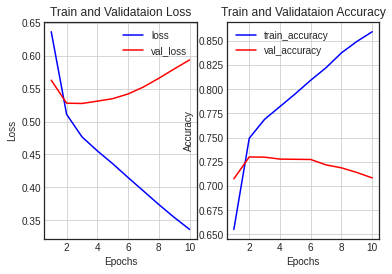

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5992 - acc: 0.7078


[0.5992065668106079, 0.7078400254249573]

### 단어의 수를 늘린 후 재학습

In [ ]:
# 길이를 500으로 맞춤
# 길이가 500이 안되는 데이터들은 앞부분을 0으로 채움 (padding = 'pre')
num_words = 1000
max_len = 500

pad_x_train2 = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test2 = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

데이터 확인

In [ ]:
print(len(x_train[0]))
print(len(pad_x_train2[0]))

218
500


In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, # 1000개의 단어들에 대해 임베딩
                    output_dim = 32, # 출력 임베딩 벡터 크기
                    input_length = max_len)) # # 입력 시퀀스 길이

model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           32000     
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 48,001
Trainable params: 48,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['acc'])

In [ ]:
history2 = model.fit(pad_x_train2, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2, verbose = False)

In [ ]:
history_dict2 = history2.history
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
accuracy = history_dict2['acc']
val_accuracy = history_dict2['val_acc']
epochs = range(1, len(loss) + 1)

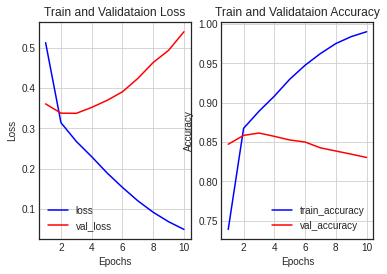

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

In [ ]:
model.evaluate(pad_x_test2, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5132 - acc: 0.8319


[0.5132318735122681, 0.8319200277328491]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## 단어 임베딩의 종류
- LSA

- Word2Vec

- GloVe

- FastText

- etc..

<!-- ## 사전 훈련된 모델
https://github.com/Hironsan/awesome-embedding-models#pre-trained-word-vectors -->

## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

### 구텐베르크 프로젝트 예제
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

In [ ]:
import requests
import re

### 데이터 다운로드

In [ ]:
res = requests.get('https://www.gutenberg.org/files/2591/2591-0.txt')

### 데이터 전처리

### 정규표현식
[자주 사용하는 문자 클래스]

<img src="https://www.nextree.co.kr/content/images/2021/01/jhkim-140117-RegularExpression-191.png" width = "500" height = "700">


https://hamait.tistory.com/342

In [ ]:
grimm = res.text[2801:530661]

In [ ]:
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm) 
# 텍스트에서 알파벳과 마침표를 제외한 모든 문자들을 공백으로 대체

In [ ]:
sentences = grimm.split('. ') # 텍스트를 마침표(.)단위로 분리 (문장 단위로 분리)
data = [s.split() for s in sentences] # 모든 문장들을 공백단위로 분리(단어로 분리)

In [ ]:
len(data) # 총 문장의 수

3468

In [ ]:
print(data[0]) # 첫번째 문장
print(data[0][0]) # 첫번째 문장의 첫번째 단어

['SECOND', 'STORY', 'THE', 'SALAD', 'THE', 'STORY', 'OF', 'THE', 'YOUTH', 'WHO', 'WENT', 'FORTH', 'TO', 'LEARN', 'WHAT', 'FEAR', 'WAS', 'KING', 'GRISLY', 'BEARD', 'IRON', 'HANS', 'CAT', 'SKIN', 'SNOW', 'WHITE', 'AND', 'ROSE', 'RED', 'THE', 'BROTHERS', 'GRIMM', 'FAIRY', 'TALES', 'THE', 'GOLDEN', 'BIRD', 'A', 'certain', 'king', 'had', 'a', 'beautiful', 'garden', 'and', 'in', 'the', 'garden', 'stood', 'a', 'tree', 'which', 'bore', 'golden', 'apples']
SECOND


`gensim` 패키지로부터 WordVec을 불러오기

In [ ]:
from gensim.models.word2vec import Word2Vec

`sg` 인자에 0을 넘겨주면 CBOW, 1을 넘겨주면 Skip-gram

In [ ]:
model = Word2Vec(data, sg = 1, # CBOW
                 size = 100, # 출력 벡터의 크기
                 window = 3, # 앞 뒤로 몇개의 단어를 예측에 사용할 것인가
                 min_count = 3, # 최소 3번은 등장한 단어들만 word2vec에 사용
                 workers = 4) # 동시 처리 수

### 모델 저장 및 로드

In [ ]:
model.save('word2vec.model')

In [ ]:
pretrained_model = Word2Vec.load('word2vec.model')

### 단어를 벡터로 변환
- `wv`

In [ ]:
pretrained_model.wv['princess'] # princess라는 단어를 벡터로 변환

array([ 0.07330597, -0.06713119,  0.21274483,  0.07922667,  0.03126341,
       -0.01627228, -0.1546191 ,  0.12937666, -0.06818032,  0.09650072,
       -0.07584124, -0.04739279,  0.02298672, -0.05546233,  0.15200198,
        0.20843674, -0.16015811, -0.04033731, -0.20406982,  0.01732281,
       -0.18546678, -0.15887153,  0.22955933,  0.00231979, -0.0200377 ,
        0.15344182,  0.1428288 , -0.03725563,  0.2191899 , -0.38642833,
       -0.05316231, -0.16666976,  0.01958707, -0.26614577, -0.17014854,
       -0.11740988,  0.17839363,  0.11718371,  0.18369818,  0.19219537,
        0.06910184,  0.03466337,  0.00784454,  0.3838291 ,  0.09247109,
        0.17098293,  0.00113926, -0.11760206, -0.05245266,  0.13432826,
       -0.01893715, -0.07483143, -0.05695967, -0.10153487,  0.04742055,
       -0.19883122, -0.04569747,  0.1281524 , -0.12163612,  0.06311095,
       -0.04121239,  0.02196339,  0.12851533,  0.02005069, -0.08413702,
        0.29151702,  0.01011067, -0.16503835, -0.2446756 , -0.02

In [ ]:
pretrained_model.wv['princess'].shape

(100,)

### 유추 또는 유비(analogy)
- `wv.similarity()`에 두 단어를 넘겨주면 코사인 유사도를 구할 수 있음

In [ ]:
pretrained_model.wv.similarity('king', 'prince')

0.8239027

- `wv.most_similar()`에 단어를 넘겨주면 가장 유사한 단어를 추출할 수 있음

In [ ]:
pretrained_model.wv.most_similar('king')

[('man', 0.9356507062911987),
 ('daughter', 0.932664692401886),
 ('son', 0.9310358762741089),
 ('woman', 0.9222403764724731),
 ('old', 0.8789218664169312),
 ('queen', 0.8724333643913269),
 ('boy', 0.8534215688705444),
 ('wolf', 0.8534000515937805),
 ('miller', 0.8510046005249023),
 ('fox', 0.8450077176094055)]

- `wv_most_similar()`에 `positive`와 `negative`라는 옵션을 넘길 수 있음

In [ ]:
pretrained_model.wv.most_similar(positive = ['man', 'princess'], negative = ['woman'])
# man과 princess와 상관있으면서, woman과 상관 없는 단어

[('bird', 0.9806334972381592),
 ('cat', 0.9776247143745422),
 ('huntsman', 0.9697105884552002),
 ('miller', 0.9691020250320435),
 ('shepherd', 0.9690579771995544),
 ('peasant', 0.9686952233314514),
 ('prince', 0.9684879779815674),
 ('first', 0.9683947563171387),
 ('eldest', 0.9673948287963867),
 ('fisherman', 0.9662598371505737)]

### gensim으로 학습된 단어 임베딩을 Keras에서 불러오기

In [ ]:
from keras.models import Sequential 
from keras.layers import Embedding

In [ ]:
num_words, emb_dim = pretrained_model.wv.vectors.shape

print(num_words) # 총 단어의 수
print(emb_dim) # 벡터의 크기
print(pretrained_model.wv.vectors.shape)

2446
100
(2446, 100)


### gensim으로 학습된 단어 임베딩을 케라스의 임베딩 레이어의 가중치로 설정

In [ ]:
emb = Embedding(input_dim = num_words, output_dim = emb_dim,
                trainable = False, 
                weights = [pretrained_model.wv.vectors]) # 학습된 단어 임베딩을 케라스의 임베딩 레이어의 가중치로 설정

In [ ]:
model = Sequential()
model.add(emb)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         244600    
                                                                 
Total params: 244,600
Trainable params: 0
Non-trainable params: 244,600
_________________________________________________________________


In [ ]:
i = pretrained_model.wv.index2word.index('princess') # princess단어에 대한 word vector의 인덱스
i # princess단어의 word vector은 157번째 vector이다

157

In [ ]:
model.predict([i])

array([[ 0.07330597, -0.06713119,  0.21274483,  0.07922667,  0.03126341,
        -0.01627228, -0.1546191 ,  0.12937666, -0.06818032,  0.09650072,
        -0.07584124, -0.04739279,  0.02298672, -0.05546233,  0.15200198,
         0.20843674, -0.16015811, -0.04033731, -0.20406982,  0.01732281,
        -0.18546678, -0.15887153,  0.22955933,  0.00231979, -0.0200377 ,
         0.15344182,  0.1428288 , -0.03725563,  0.2191899 , -0.38642833,
        -0.05316231, -0.16666976,  0.01958707, -0.26614577, -0.17014854,
        -0.11740988,  0.17839363,  0.11718371,  0.18369818,  0.19219537,
         0.06910184,  0.03466337,  0.00784454,  0.3838291 ,  0.09247109,
         0.17098293,  0.00113926, -0.11760206, -0.05245266,  0.13432826,
        -0.01893715, -0.07483143, -0.05695967, -0.10153487,  0.04742055,
        -0.19883122, -0.04569747,  0.1281524 , -0.12163612,  0.06311095,
        -0.04121239,  0.02196339,  0.12851533,  0.02005069, -0.08413702,
         0.29151702,  0.01011067, -0.16503835, -0.2

## Keras에서 Word2Vec 직접 학습
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

### 데이터 준비

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

- 단어 번호와 단어의 관계를 사전으로 만듦

- 1번은 문장의 시작, 2번은 사전에 없는 단어(OOV)로 미리 지정

In [ ]:
word_index = imdb.get_word_index() # 전체 데이터 단어들의 인덱스

In [ ]:
index_word = {idx+3: word for word, idx in word_index.items()} 
# 모든 인덱스에 3을 더하고, 표시 순서를 (인덱스: 단어)로 설정

In [ ]:
# 1번은 문장의 시작, 2번은 사전에 없는 단어(OOV)로 미리 지정
index_word[1] = '<START>'
index_word[2] = '<UNKNOWN>'

In [ ]:
' '.join(index_word[i] for i in x_train[0]) 
# 훈련 데이터의 첫번째 문장이 포함하는 단어의 임베딩값들을, 인덱스에 적용해서, 단어들을 표시
# 구분자는 공백으로

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [ ]:
num_words = max(index_word) + 1
num_words

88588

### 텍스트를 단어 번호로 바꾸기

In [ ]:
texts = []
for data in x_train:
  text = ' '.join(index_word[i] for i in data)
  texts.append(text)
# 모든 훈련데이터들을 텍스트로 표시

In [ ]:
len(texts)

25000

- `Tokenizer`를 사용해 텍스트를 단어로 바꿈

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(texts) # 모든 텍스트들을 토큰화

new_data = tok.texts_to_sequences(texts) # 시퀀스로 변환
new_data[0][:10] 

[28, 11, 19, 13, 41, 526, 968, 1618, 1381, 63]

### 단어쌍 만들기

In [ ]:
from tensorflow.keras.preprocessing.sequence import make_sampling_table, skipgrams

In [ ]:
VOCAB_SIZE = len(tok.word_index)
print(VOCAB_SIZE) # 총 단어의 수

88581


- 단어를 무작위로 추출하면 자주 나오는 단어가 더 많이 나오게됨

- 이를 방지하기위해 단어를 추출할 확률의 균형을 맞춘 샘플링 표를 생성

In [ ]:
table = make_sampling_table(VOCAB_SIZE)
table

array([0.00315225, 0.00315225, 0.00547597, ..., 1.        , 1.        ,
       1.        ])

- 두 단어씩 뽑아 좌우 2단어(`window_size=2`)안에 들어있는 경우가 있는지 없는지 확인하여 데이터를 생성

In [ ]:
couples, labels = skipgrams(data, VOCAB_SIZE, window_size = 2, sampling_table = table)

In [ ]:
couples[:5]

[[1603, 26673], [19280, 60], [85010, 2364], [14437, 5], [239, 9]]

- `labels`에는 윈도우 안에 들어있는 경우가 있으면 1, 없으면 0

In [ ]:
labels[:5]

[0, 1, 0, 1, 1]

- 대상 단어는 `word_target`으로, 맥락 단어는 `word_context`로 모음

In [ ]:
word_target, word_context = zip(*couples)

- 배열로 바꾼다.

In [ ]:
word_target = np.asarray(word_target, dtype = 'int32')
word_context = np.asarray(word_context, dtype = 'int32')
labels = np.asarray(labels, dtype = 'int32')

In [ ]:
word_target.shape

(264,)

In [ ]:
word_context.shape

(264,)

### Skip-gram 모형

- Skip-gram 모형은 함수형 API를 사용해야 함

In [ ]:
from tensorflow.keras.layers import Activation, Dot, Embedding, Flatten, Input, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model() :
  input_target = Input(shape = (1,))
  input_context = Input(shape = (1,))

  emb = Embedding(input_dim = VOCAB_SIZE, output_dim = 8)
  target = emb(input_target)
  context = emb(input_context)

  dot = Dot(axes = 2)([target, context])
  flatten = Reshape((1,))(dot)
  output = Activation('sigmoid')(flatten)
  skipgram = Model(inputs = [input_target, input_context], outputs = output)

  return skipgram

In [ ]:
model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 8)         708648      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dot (Dot)                      (None, 1, 1)         0           ['embedding_5[0][0]',        

### 모델 컴파일 및 학습

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [ ]:
model.fit([word_target, word_context], labels, epochs = 30, verbose = False)

### 임베딩 레이어 저장 및 로드

In [ ]:
emb = model.layers[2]

In [ ]:
# emb.get_weights() # 임베딩 가중치

In [ ]:
np.save('emb.npy', emb.get_weights()[0]) # 임베딩 가중치를 저장

- 임베딩 레이어 로드

In [ ]:
w = np.load('emb.npy')

- 임베딩 레이어를 추가할때 `trainable`를 `False`로 하면 추가학습이 이루어 지지 않는다.

In [ ]:
emb_ff = Embedding(input_dim = num_words, output_dim = 8, input_length = 30,
                   weights = [w], 
                   trainable = False) # 사전에 만들어진 가중치를 사용하기에 추가학습 X 

## 사전 훈련된 단어 임베딩 사용하기 : GloVe 임베딩

- 코드 출처: 케라스 창시자에게 배우는 딥러닝

### 원본 IMDB 텍스트 내려받기
- http://mng.bz/0tIo

In [ ]:
import os
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
local_zip = '/content/IMDB Dataset.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # 압축파일 읽기
zip_ref.extractall('/content') # 압축파일 추출
zip_ref.close() # 압축파일 닫기

In [ ]:
imdb = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
x = imdb['review']
y = imdb['sentiment']
y = y.replace('positive', 1)
y = y.replace('negative', 0)

In [ ]:
x[0], y[0]

('One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked. They are right  as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO. Trust me  this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs  sex or violence. Its is hardcore  in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda. Em City is home to many..Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more....so scuffles  death stares  dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other s

### 텍스트 전처리

In [ ]:
# 텍스트 전처리 (알파벳과 마침표를 제외한 모든 부분들을 공백으로 대체)
for i in range(len(x)) :
  x[i] = re.sub('<br />', ' ', x[i]) 
  x[i] = re.sub(r'[^a-zA-Z\.]', ' ', x[i])

In [ ]:
x[0], y[0]

('One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked. They are right  as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO. Trust me  this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs  sex or violence. Its is hardcore  in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda. Em City is home to many..Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more....so scuffles  death stares  dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other s

### 데이터 토큰화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 500
max_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(x)

In [ ]:
sequences = tokenizer.texts_to_sequences(x)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
 data = pad_sequences(sequences, maxlen = max_len)
 data = np.asarray(data, dtype = 'float32')
 labels = np.asarray(y, dtype = 'float32')

 print(data.shape)
 print(labels.shape)

(50000, 500)
(50000,)


In [ ]:
x_train, x_test ,y_train, y_test = train_test_split(data, labels, test_size = 0.5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 500), (25000, 500), (25000,), (25000,))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((20000, 500), (5000, 500), (20000,), (5000,))

### GloVe 단어 임베딩 내려받기

- https://nlp.stanford.edu/projects/glove

- http://nlp.stanford.edu/data/glove.6B.zip

- 시간 소요 (5~7m)

In [ ]:
'''
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
'''

In [ ]:
glove_zip = '/content/glove.6B.zip'
zip_ref = zipfile.ZipFile(glove_zip, 'r') # 압축파일 읽기
zip_ref.extractall('/content') # 압축파일 추출
zip_ref.close() # 압축파일 닫기

### 임베딩 전처리
- GloVe 파싱

In [ ]:
embedding_index = {}
f = open(os.path.join('/content', 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f :
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embedding_index[word] = coefs

f.close()

print(len(embedding_index))

400000


In [ ]:
embedding_dim = 100

embedding_mat = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_mat[i] = embedding_vector

In [ ]:
embedding_mat.shape

(10000, 100)

### 모델 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 50000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                1600032   
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# glove의 엠베딩 가중치들을 모델에 적용
model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val), verbose = False)

In [ ]:
model.save_weights('pre_trained_glove_model.h5')

### 시각화

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

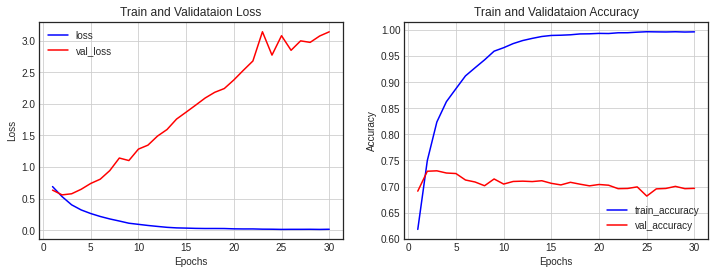

In [ ]:
epochs = range(1, 31)

plt.figure(figsize = (12 , 4))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

## 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련

In [ ]:
model2 = Sequential()

model2.add(Embedding(max_words, embedding_dim, input_length = max_len))
model2.add(Flatten())
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 50000)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                1600032   
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

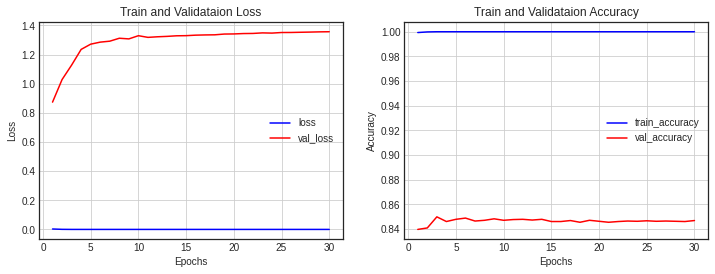

In [ ]:
history2 = model2.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val), verbose = False)


history_dict2 = history2.history

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
accuracy = history_dict2['accuracy']
val_accuracy = history_dict2['val_accuracy']

plt.figure(figsize = (12 , 4))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

### 테스트 데이터 토큰화

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 3.0218 - accuracy: 0.6995


[3.0217599868774414, 0.6995199918746948]

# 02 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`

- 순환층을 쌓게 되면 모든 순환층에 순차데이터 필요
- 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야함 
- (오직 마지막 순환층만 타임스텝의 은닉상태를 출력)
- (마지막 순환층을 제외한 모든 순환층의 return_sequences를 True로)


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32)) # 마지막 타임스텝에 대한 은닉상태만 출력 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True)) # 전체 타임스텝에 대한 은닉상태 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_words = 10000 # 어휘사전 크기 (자주출현한 단어 상위 10000개)
max_len = 500 # 패딩 길이
batch_size = 32

(Input_train, y_train), (Input_test, y_test) = imdb.load_data(num_words = num_words)
print(Input_train.shape)
print(Input_test.shape)

(25000,)
(25000,)


In [ ]:
# 길이 500으로 패딩
Input_train = sequence.pad_sequences(Input_train, maxlen = max_len)
Input_test = sequence.pad_sequences(Input_test, maxlen = max_len)
print(Input_train.shape)
print(Input_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(Input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2, verbose = False)

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

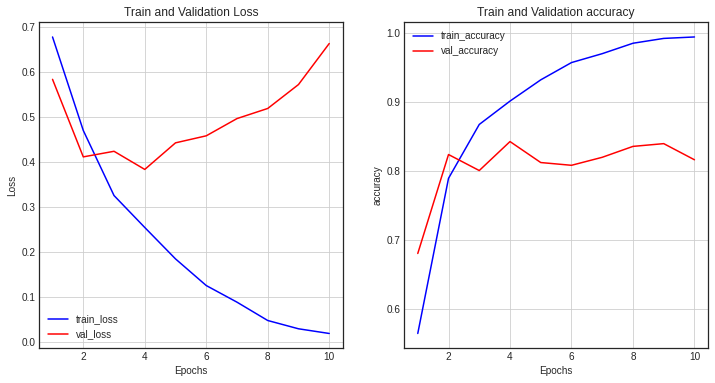

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("accuracy")
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(Input_test, y_test)

782/782 [==============================] - 32s 40ms/step - loss: 0.6693 - acc: 0.8033


[0.6693255305290222, 0.8032799959182739]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- ### **SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음**

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)

print(x_train.shape)
print(x_test.shape)

(8982,)
(2246,)


(8982, 500)
(2246, 500)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 패딩크기 = 500
Input_train = sequence.pad_sequences(x_train, maxlen = max_len)
Input_test = sequence.pad_sequences(x_test, maxlen = max_len)

print(Input_train.shape)
print(Input_test.shape)

(8982, 500)
(2246, 500)


### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim = num_words, output_dim = 64))
model2.add(LSTM(64, return_sequences = True))
model2.add(LSTM(32))
model2.add(Dense(46, activation = 'softmax'))

model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history2 = model2.fit(Input_train, y_train,
                     epochs = 20, batch_size = 32,
                     validation_split = 0.2, verbose = False)

### 시각화

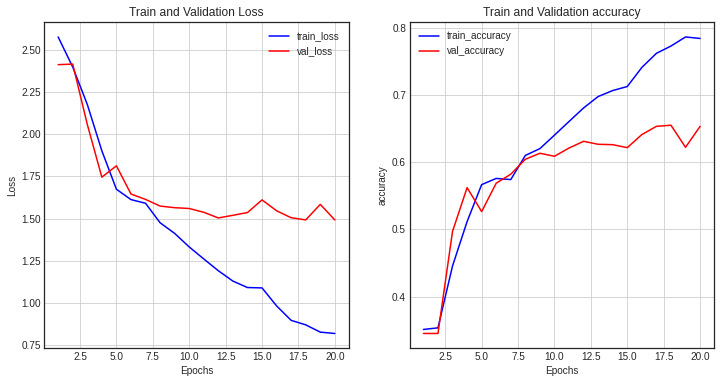

In [ ]:
history_dict2 = history2.history

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
accuracy = history_dict2['acc']
val_accuracy = history_dict2['val_acc']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("accuracy")
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가


In [ ]:
model2.evaluate(Input_test, y_test)

71/71 [==============================] - 1s 19ms/step - loss: 1.6330 - acc: 0.6402


[1.6330054998397827, 0.6402493119239807]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [ ]:
num_words = 10000 # 어휘사전 크기 (자주출현한 단어 상위 10000개)
max_len = 500 # 패딩 길이
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)
print(input_train.shape)
print(input_test.shape)

(25000,)
(25000,)


In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test = sequence.pad_sequences(input_test, maxlen = max_len)
print(input_train.shape)
print(input_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim = num_words, output_dim = 32))
model3.add(LSTM(32))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history3 = model3.fit(input_train, y_train,
                     epochs = 20, batch_size = 32,
                     validation_split = 0.2, verbose = False)

### 시각화

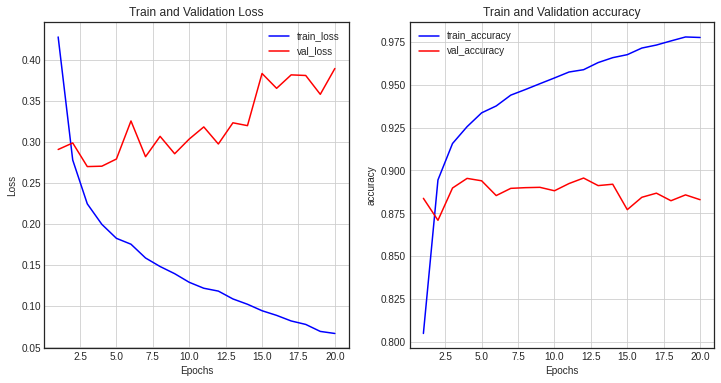

In [ ]:
history_dict3 = history3.history

loss = history_dict3['loss']
val_loss = history_dict3['val_loss']
accuracy = history_dict3['acc']
val_accuracy = history_dict3['val_acc']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("accuracy")
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가

In [ ]:
model3.evaluate(input_test, y_test)

782/782 [==============================] - 7s 8ms/step - loss: 0.4435 - acc: 0.8662


[0.4435061812400818, 0.866159975528717]

# 시계열
### Cosine 함수를 이용한 순환 신경망

In [ ]:
import numpy as np

In [ ]:
np.random.seed(111)

time = np.arange(361) # 0 ~ 360의 숫자
month_time = (time % 30) 
print(month_time) # 0 ~ 29까지 12번 반복된 숫자들 (12개의 월)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28

In [ ]:
month_time = month_time / 30 # 모든 숫자들을 30으로 나눔
month_time.shape

(361,)

In [ ]:
# month_time이 0.5보다 작으면 (매월의 15일이 안되는 날에는)
# cos(2 * pi * month_time)을 적용  
# 0.5보다 크면 (매월의 15일이 넘는 날에는) cos(2 * pi * month_time)을 적용
time_series = 20 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361)) 

In [ ]:
len(time_series)

361

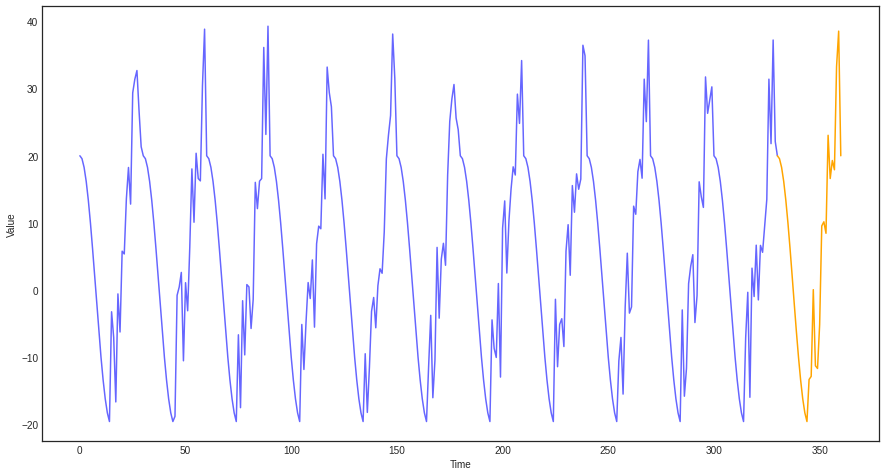

In [ ]:
plt.figure(figsize = (15, 8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 331),
         time_series[:331],
         color = 'blue', alpha = 0.6, label = 'Train Data')

plt.plot(np.arange(330, 361),
         time_series[330:],
         color = 'orange', label = 'Test Data')

plt.show()

### 데이터 전처리

In [ ]:
# 모든 시점 i에 대해서 
# 이전 n개의 시점의 관측값을 훈련데이터, i+n 시점의 관측값을 평가데이터로 지정
def make_data(time_series, n):
  x_train_full, y_train_full = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n) < len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else :
      break

  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

  return x_train_full, y_train_full

In [ ]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [ ]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [ ]:
# 3차원으로 전환
x_train_full = x_train_full.reshape(-1, n, 1) 
y_train_full = y_train_full.reshape(-1, 1)
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [ ]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [ ]:
print(x_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 1) (21, 1)


## 모델 구성

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
def build_model():
  model = Sequential()

  model.add(SimpleRNN(32, activation = 'tanh', input_shape = (n, 1)))
  model.add(Dense(1))

  model.compile(loss = 'mse',
              optimizer = 'adam')
  
  return model

model = build_model()

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
model.fit(x_train, y_train,
          epochs = 100, batch_size = 12, verbose = False)

## 예측값 그려보기

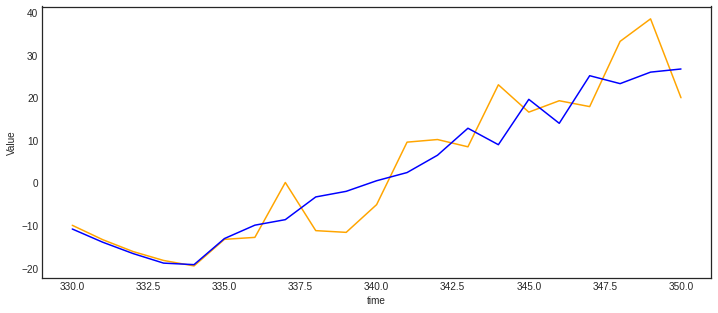

In [ ]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction)) # 330 ~ 350

plt.figure(figsize = (12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'Prediction')
# y_test.flatten() : y_test (21 X 1)의 2차원을 1차원 (21,)으로 변경

plt.show()

## 모델 재구성 (2)
- LSTM 사용

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
def build_model2():
  model = Sequential()

  model.add(LSTM(32, return_sequences = True, input_shape = (n, 1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(loss = 'mse',
              optimizer = 'adam')
  
  return model

model2 = build_model2()

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10, 32)            4352      
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [ ]:
model2.fit(x_train, y_train,
          epochs = 100, batch_size = 12, verbose = False)

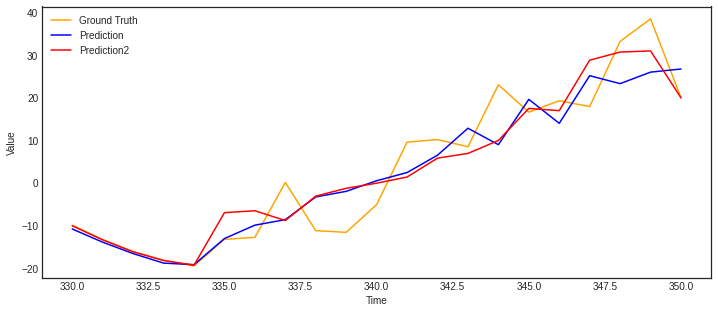

In [ ]:
prediction2 = model2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction2)) # 330 ~ 350

plt.figure(figsize = (12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'Prediction')
plt.plot(pred_range, prediction2.flatten(), color = 'red', label = 'Prediction2')

plt.legend()

plt.show()

## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
def build_model3():
  model = Sequential()

  model.add(GRU(30, return_sequences = True, input_shape = (n, 1)))
  model.add(GRU(30))
  model.add(Dense(1))

  model.compile(loss = 'mse',
              optimizer = 'adam')
  
  return model

model3 = build_model3()

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 30)            2970      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [ ]:
model3.fit(x_train, y_train,
          epochs = 100, batch_size = 12, verbose = False)

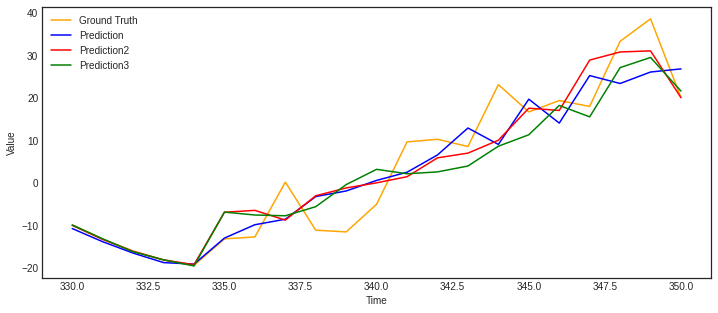

In [ ]:
prediction3 = model3.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction3)) # 330 ~ 350

plt.figure(figsize = (12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'Prediction')
plt.plot(pred_range, prediction2.flatten(), color = 'red', label = 'Prediction2')
plt.plot(pred_range, prediction3.flatten(), color = 'green', label = 'Prediction3')

plt.legend()

plt.show()

# Conv1D 

### - **텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능**

### - **타임스텝의 순서에 민감하지 X**


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://jiho-ml.com/content/images/2020/07/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://henrypaik1.github.io/img/conv1d.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [ ]:
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [ ]:
num_words = 10000 # 어휘사전 크기
max_len = 500 # 패딩 크기
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)

print(input_train.shape)
print(input_test.shape)

(25000,)
(25000,)


In [ ]:
# 패딩
pad_x_train = pad_sequences(input_train, maxlen = max_len)
pad_x_test = pad_sequences(input_test, maxlen = max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
def build_model4():
  model = Sequential()

  model.add(Embedding(input_dim = num_words, output_dim = 32,
                      input_length = max_len))
  model.add(Conv1D(32, 7, activation = 'relu'))
  model.add(MaxPooling1D(7))
  model.add(Conv1D(32, 5, activation = 'relu'))
  model.add(MaxPooling1D(5))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(1e-4),
              metrics = ['accuracy'])
  
  return model

model4 = build_model4()

model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 32)           320000    
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           7200      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 70, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)             

### 모델 학습

In [ ]:
history4 = model4.fit(pad_x_train, y_train,
                      epochs = 30, batch_size = 128, validation_split = 0.2, verbose = False)

### 시각화

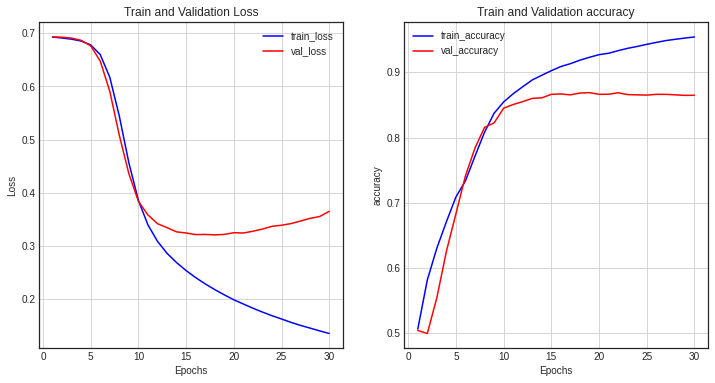

In [ ]:
history_dict4 = history4.history

loss = history_dict4['loss']
val_loss = history_dict4['val_loss']
accuracy = history_dict4['accuracy']
val_accuracy = history_dict4['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("accuracy")
ax2.grid()
ax2.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음